In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
path="/content/drive/MyDrive/AI-Shivkumar Week5"

In [14]:
!unzip "/content/drive/MyDrive/AI-Shivkumar Week5" -d "/content/drive/MyDrive/AI-Shivkumar Week5"


unzip:  cannot find or open /content/drive/MyDrive/AI-Shivkumar Week5, /content/drive/MyDrive/AI-Shivkumar Week5.zip or /content/drive/MyDrive/AI-Shivkumar Week5.ZIP.


In [16]:
test_dir = "/content/drive/MyDrive/AI-Shivkumar Week5/FruitinAmazon/FruitinAmazon/test"
train_dir = "/content/drive/MyDrive/AI-Shivkumar Week5/FruitinAmazon/FruitinAmazon/train"

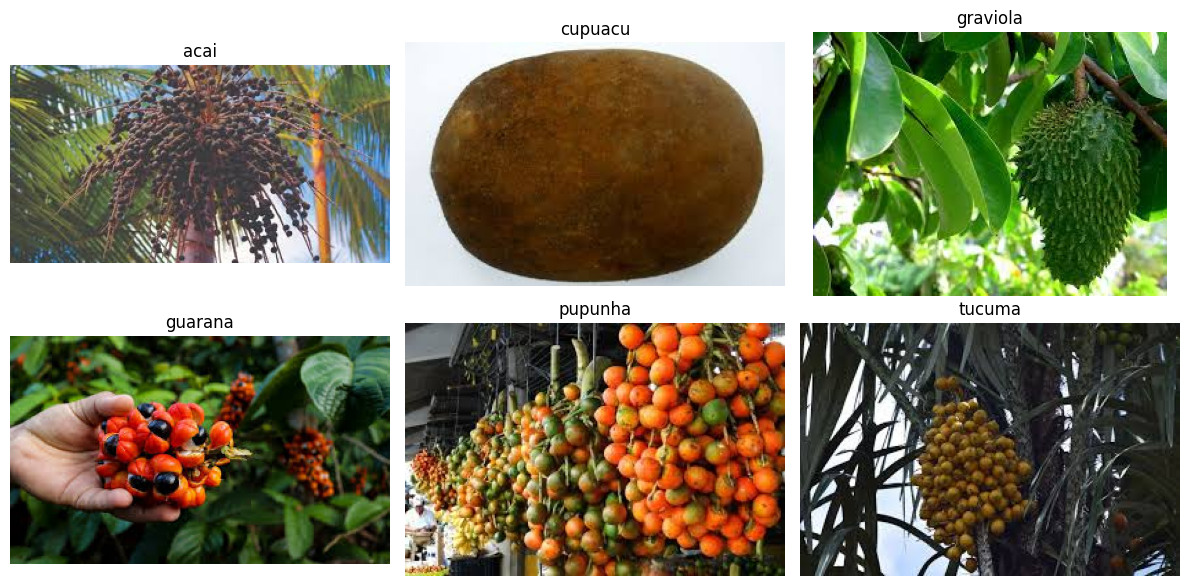

In [17]:
import matplotlib.pyplot as plt
import os
import random
from PIL import Image

# Get class names (each subdirectory is a class)
class_names = sorted(os.listdir(train_dir))

# Select one random image from each class
sample_images = []
for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    image_name = random.choice(os.listdir(class_path))  # Pick a random image
    image_path = os.path.join(class_path, image_name)
    sample_images.append((image_path, class_name))

# Display images in a grid
fig, axes = plt.subplots(2, len(sample_images) // 2, figsize=(12, 6))
axes = axes.flatten()

for i, (img_path, class_name) in enumerate(sample_images):  # Corrected unpacking
    img = Image.open(img_path)
    axes[i].imshow(img)
    axes[i].set_title(class_name)
    axes[i].axis("off")

plt.tight_layout()
plt.show()


In [18]:
# Check and remove corrupted images
corrupted_images = []

for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        try:
            with Image.open(image_path) as img:
                img.verify()  # Check if image is valid
        except (IOError, SyntaxError):
            corrupted_images.append(image_path)
            os.remove(image_path)  # Remove corrupted image
            print(f"Removed corrupted image: {image_path}")

if not corrupted_images:
    print("No corrupted images found.")


No corrupted images found.


In [19]:
import tensorflow as tf
# Define image size and batch size
img_height = 128  # Example image height
img_width = 128  # Example image width
batch_size = 32
validation_split = 0.2  # 80% training, 20% validation
# Create a preprocessing layer for normalization
rescale = tf.keras.layers.Rescaling(1./255)  # Normalize pixel values to [0, 1]
# Create training dataset with normalization
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset='training',
    seed=123
)
# Apply the normalization (Rescaling) to the dataset
train_ds = train_ds.map(lambda x, y: (rescale(x), y))
# Create validation dataset with normalization
val_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,
    validation_split=validation_split,
    subset='validation',
    seed=123
)
# Apply the normalization (Rescaling) to the validation dataset
val_ds = val_ds.map(lambda x, y: (rescale(x), y))

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [20]:
from tensorflow import keras
from tensorflow.keras import layers

# Define CNN model
model = keras.Sequential([
    keras.Input(shape=(img_height, img_width, 3)),  # Explicit Input layer
    layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(len(class_names), activation="softmax")  # Output layer based on class count
])

# Show model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Compile the model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

print("Model compiled successfully!")


Model compiled successfully!


In [22]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define the callbacks
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    batch_size=16,
    callbacks=[checkpoint, early_stopping]
)

print("Model training complete!")


Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step - accuracy: 0.1701 - loss: 1.8242
Epoch 1: val_loss improved from inf to 1.61416, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 656ms/step - accuracy: 0.1693 - loss: 1.8282 - val_accuracy: 0.1667 - val_loss: 1.6142
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 735ms/step - accuracy: 0.3912 - loss: 1.5529
Epoch 2: val_loss improved from 1.61416 to 1.36780, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.3837 - loss: 1.5517 - val_accuracy: 0.5000 - val_loss: 1.3678
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 801ms/step - accuracy: 0.4641 - loss: 1.3956
Epoch 3: val_loss did not improve from 1.36780
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 981ms/step - accuracy: 0.4696 - loss: 1.3870 - val_accuracy: 0.5556 - val_loss: 1.3781
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5486 - loss: 1.1726
Epoch 4: val_loss improved from 1.36780 to 0.91078, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.5573 - loss: 1.1638 - val_accuracy: 0.7778 - val_loss: 0.9108
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step - accuracy: 0.7245 - loss: 0.8617
Epoch 5: val_loss improved from 0.91078 to 0.78660, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 483ms/step - accuracy: 0.7274 - loss: 0.8654 - val_accuracy: 0.6667 - val_loss: 0.7866
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - accuracy: 0.7992 - loss: 0.7049
Epoch 6: val_loss did not improve from 0.78660
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 560ms/step - accuracy: 0.8043 - loss: 0.7010 - val_accuracy: 0.8333 - val_loss: 0.9551
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step - accuracy: 0.8848 - loss: 0.5168
Epoch 7: val_loss improved from 0.78660 to 0.40413, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 579ms/step - accuracy: 0.8859 - loss: 0.5186 - val_accuracy: 0.8889 - val_loss: 0.4041
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 659ms/step - accuracy: 0.9300 - loss: 0.3428
Epoch 8: val_loss improved from 0.40413 to 0.38483, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 911ms/step - accuracy: 0.9301 - loss: 0.3397 - val_accuracy: 0.8333 - val_loss: 0.3848
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step - accuracy: 0.9699 - loss: 0.1741
Epoch 9: val_loss did not improve from 0.38483
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 489ms/step - accuracy: 0.9705 - loss: 0.1777 - val_accuracy: 0.8333 - val_loss: 0.6018
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step - accuracy: 0.9797 - loss: 0.1509
Epoch 10: val_loss improved from 0.38483 to 0.28544, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 621ms/step - accuracy: 0.9813 - loss: 0.1483 - val_accuracy: 0.8889 - val_loss: 0.2854
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step - accuracy: 1.0000 - loss: 0.0900
Epoch 11: val_loss did not improve from 0.28544
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 568ms/step - accuracy: 1.0000 - loss: 0.0894 - val_accuracy: 0.8889 - val_loss: 0.3337
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 1.0000 - loss: 0.0564
Epoch 12: val_loss did not improve from 0.28544
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 455ms/step - accuracy: 1.0000 - loss: 0.0575 - val_accuracy: 0.8889 - val_loss: 0.6212
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 550ms/step - accuracy: 0.9803 - loss: 0.0735
Epoch 13: val_loss did not improve from 0.28544
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 710ms/step - accuracy: 0.9783 - loss: 0.0750 - val_accuracy: 0.8889 - val_loss: 0.3876
Epoch 14/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 519ms/step - accuracy: 1.0000 - loss: 0.0343
Epoch 14: val_loss did not improve from 0.28544
3/3 

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 623ms/step - accuracy: 0.9813 - loss: 0.0732 - val_accuracy: 0.9444 - val_loss: 0.2060
Epoch 17/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step - accuracy: 0.9902 - loss: 0.0292
Epoch 17: val_loss did not improve from 0.20604
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 502ms/step - accuracy: 0.9891 - loss: 0.0305 - val_accuracy: 0.9444 - val_loss: 0.2279
Epoch 18/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step - accuracy: 1.0000 - loss: 0.0145
Epoch 18: val_loss did not improve from 0.20604
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 442ms/step - accuracy: 1.0000 - loss: 0.0141 - val_accuracy: 0.8889 - val_loss: 0.4009
Epoch 19/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 514ms/step - accuracy: 1.0000 - loss: 0.0090
Epoch 19: val_loss did not improve from 0.20604
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 694ms/step - accuracy: 1.0000 - loss: 0.0090 - val_accuracy: 0.8889 - val_loss: 0.6898
Epoch 20/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 650ms/step - accuracy: 1.0000 - loss: 0.0091
Epoch 20: val_loss did not improve from 0.20604
3/3 

**Evaluate the Model**

In [23]:
# Evaluate the model
test_loss, test_acc = model.evaluate(val_ds)
print(f"Test Accuracy: {test_acc:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.9444 - loss: 0.2060
Test Accuracy: 0.9444


**Save and Load the Model**

In [24]:
# Save the trained model
model.save("cnn_model.h5")
print("Model saved successfully!")

# Load the saved model
loaded_model = keras.models.load_model("cnn_model.h5")
print("Model loaded successfully!")


Model saved successfully!


Model loaded successfully!


**Predictions and Classification Report**

In [25]:
from sklearn.metrics import classification_report
import numpy as np

# Get true labels and predictions
y_true = np.concatenate([y for x, y in val_ds], axis=0)
y_pred = np.argmax(model.predict(val_ds), axis=1)

# Get unique classes in y_true
unique_classes = np.unique(y_true)

# Filter target_names to match the unique classes
filtered_target_names = [class_names[i] for i in unique_classes]

# Generate classification report
report = classification_report(
    y_true,
    y_pred,
    target_names=filtered_target_names,
    labels=unique_classes,  # Align labels with target_names
    output_dict=False       # Output as a formatted string
)
print(report)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
              precision    recall  f1-score   support

     pupunha       1.00      0.67      0.80         3
      tucuma       0.94      1.00      0.97        15

    accuracy                           0.94        18
   macro avg       0.97      0.83      0.88        18
weighted avg       0.95      0.94      0.94        18



** Visualization**


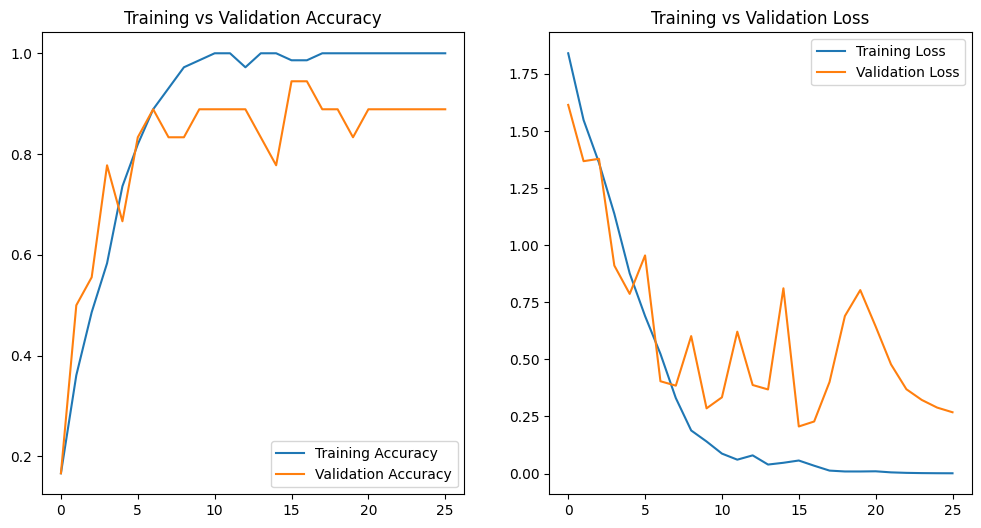

In [26]:
import matplotlib.pyplot as plt

# Extract accuracy and loss from history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend()
plt.title("Training vs Validation Loss")

plt.show()

